# **Weather Prediction**
### Group Number : 07
### EG/2020/3956 - Hariharasakthy N.
### EG/2020/4119 - Praveenan J.


### Data Collection

In [1883]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [1884]:
#Read the data file using pandas
data=pd.read_csv('Weather_Data.csv')
data_dt = data.copy()


### Data Analyzing

In [1885]:
#Display top 5 data in the dataset
data_dt.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [1886]:
#(Row ,Column)
data_dt.shape

(8784, 8)

In [1887]:
#To display  column names of the dataset
data_dt.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [1888]:
#To display the data types of the all features & label
data_dt.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [1889]:
#Counting the occurrences of each unique value in the 'Weather' column
data_dt.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [1890]:
#Return number of unique elements in weather column
data_dt.Weather.nunique()

50

In [1891]:
#Describe the datasets
data_dt.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Decision Tree Algorithm

### Preprocessing For Decision Tree Algorithm

#### Handling Null values

In [1892]:
# Counting the number of missing values in each column of the new 'weather_df' DataFrame
data_dt.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

##### Feature Selection

In [1893]:
# Drop the column Date/Time
data_dt.drop(columns=['Date/Time'],axis=1,inplace=True)

##### Label Encoding

In [1894]:
# Label Encoding
# Creating an instance of the LabelEncoder class
le=LabelEncoder()

# Applying the label encoding to the "Weather" column in the DataFrame
# This replaces the categorical values with corresponding numerical labels
data_dt["Weather"]=le.fit_transform(data_dt["Weather"])

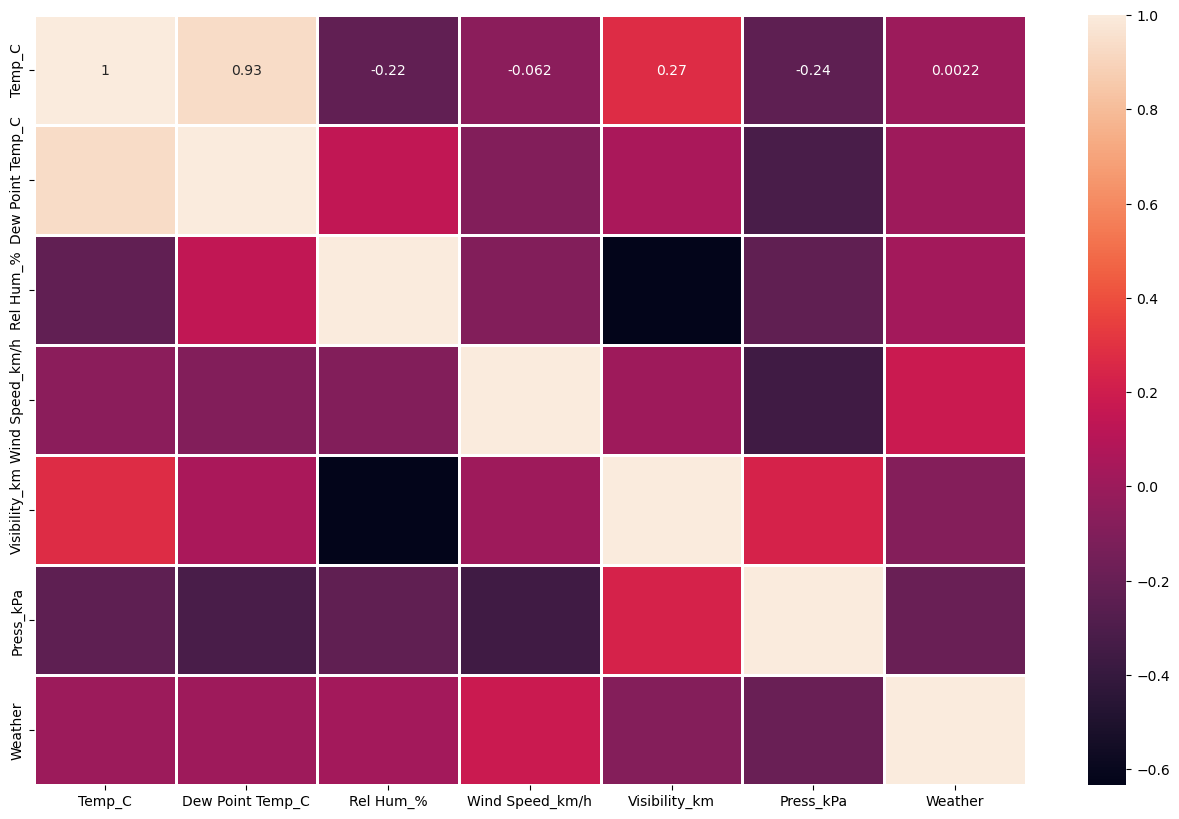

In [1895]:
#correlation between variables
#heat map
fig,ax=plt.subplots(1,1,figsize=(16,10))
sns.heatmap(data_dt.corr(),annot=True,linewidths=1)
plt.show()

In [1896]:
# Extracting all rows and all columns except the last one from the data set and assigning it to 'x'
x=data_dt.iloc[:,:-1]
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [1897]:
# Extracting the last column from the data set and assigning it to 'y'
y=data_dt.iloc[:,-1]
y

0        7
1        7
2        9
3        9
4        7
        ..
8779    35
8780    35
8781    35
8782    35
8783    35
Name: Weather, Length: 8784, dtype: int32

##### Feature Scalling

In [1898]:
# Creating an instance of the RandomOverSampler
sm=RandomOverSampler()

# Resampling the features 'x' and labels 'y' using the RandomOverSampler
x,y=sm.fit_resample(x,y)

In [1899]:
# Creating an instance of MinMaxScaler
ms=MinMaxScaler()

# Scaling the features in 'x' using the MinMaxScaler
Xsc=ms.fit_transform(x)

# Displaying the scaled features
Xsc

array([[0.38188277, 0.46502836, 0.82926829, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.46880907, 0.84146341, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.47448015, 0.86585366, 0.08433735, 0.07900208,
        0.61011419],
       ...,
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827]])

##### Defining Classification Report Function

In [1900]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import gc
import matplotlib.pyplot as plt

# Define lists to store scores and models
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
models = []

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)
    
    # Display confusion matrix with a specified size
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(30, 30))  # Adjust the size as needed
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
   
    # Plot the confusion matrix
    disp.plot(cmap='viridis')
    
    # Access the underlying Axes object and set font size
    plt.tick_params(axis='both', which='both', labelsize=4)
    
    # Calculate and print accuracy, precision, recall, and F1 score
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print the test accuracy
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Append scores and model to lists
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    models.append(model)
    
    # Clean up memory
    gc.collect()

#### Splitting dataset into training and testing sets

In [1901]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.3,random_state=4)

#### Cross Validation

In [1902]:
# Creating a DecisionTreeClassifier instance with specified parameters
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)

# Performing cross-validation
cv_scores = cross_val_score(dt, Xsc, y, cv=5) 

# Displaying cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Training the decision tree model on the training set
dt.fit(X_train,y_train)



Cross-Validation Scores: [0.89197531 0.89159544 0.88922127 0.89074074 0.8965812 ]
Mean CV Score: 0.8920227920227921


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=2)

### Evaluate the Model

Train accuracy: 0.904965404965405
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.67      0.49       611
           1       0.39      0.12      0.18       606
           2       0.70      0.77      0.73       608
           3       0.78      0.75      0.77       642
           4       1.00      1.00      1.00       662
           5       1.00      1.00      1.00       621
           6       1.00      1.00      1.00       599
           7       0.84      0.69      0.76       668
           8       0.92      1.00      0.96       603
           9       1.00      1.00      1.00       614
          10       1.00      1.00      1.00       604
          11       0.94      1.00      0.97       615
          12       1.00      1.00      1.00       618
          13       0.94      0.93      0.93       644
          14       0.97      1.00      0.99       639
          15       1.00      1.00      1.00       615
          16       1.00 

Accuracy: 0.8985754985754986
Precision: 0.8941685243522092
Recall: 0.8989683222681003
F1 Score: 0.8898684348081183


<Figure size 3000x3000 with 0 Axes>

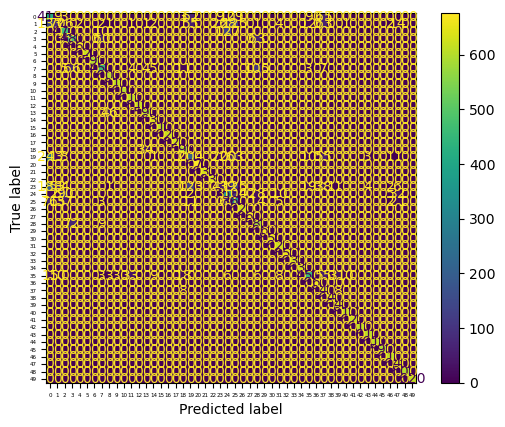

In [1903]:
#  Generating and printing the classification report for the model's predictions on the test set
# print(classification_report(y_test,y_pred3))
train_accuracy = dt.score(X_train, y_train)

# Print the train accuracy
print("Train accuracy:", train_accuracy)

# Call the function which is  defined in the early section
train_and_evaluate_model(dt, X_train, X_test, y_train, y_test)

# Logistic Regression

#### Data Analyzing

In [1904]:
#Counting the occurrences of each unique value in the 'Weather' column
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [1905]:
#Return number of unique elements in weather column
filtered_data=data
filtered_data.Weather.nunique()

50

## Preprocessing for Logistic Regression

##### Converting the Weather Categories into Standard Categories

In [1906]:
# Importing the chain function from the itertools module
from itertools import chain  


In [1907]:
# Defining a function to create a flat list from a comma-separated string
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(',')] # Splitting each comma-separated value into a list of words
    flat_list=list(chain(*list_of_lists)) # Flattening the list of lists into a single list
    return flat_list # Returning the resulting flat list


# Defining a function to determine a simplified weather description based on input conditions
def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'CLEAR'
    elif 'Cloudy' in list1:
        return 'CLOUDY'
    else:
        return 'RAIN'

In [1908]:
# Input string
x='Thunderstorms,Moderate Rain Showers,Fog'

In [1909]:
# Using Create_list to convert the string to a list
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [1910]:
# Using Get_Weather to get the simplified weather description
Get_Weather(Create_list(x))

'RAIN+FOG'

In [1911]:
# Applying the Get_Weather function to each element in the 'Weather' column and creating a new column 'Std_Weather'
filtered_data['Std_Weather']=filtered_data['Weather'].apply(lambda x:Get_Weather(Create_list(x)))

In [1912]:
# Displaying the first few rows of the filtered_data DataFrame
filtered_data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [1913]:
# Displaying the count of each unique value in the 'Std_Weather' column
filtered_data.Std_Weather.value_counts()

Std_Weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

#### Sample selection and Data balancing

In [1914]:
# Creating a DataFrame 'cloudy_df' by sampling 600 rows where 'Std_Weather' is 'Cloudy'
cloudy_df=filtered_data[filtered_data['Std_Weather']=='CLOUDY'].sample(600)

# Creating a DataFrame 'clear_df' by sampling 600 rows where 'Std_Weather' is 'Clear'
clear_df=filtered_data[filtered_data['Std_Weather']=='CLEAR'].sample(600)

# Creating a DataFrame 'rain_df' containing all rows where 'Std_Weather' is 'RAIN'
rain_df=filtered_data[filtered_data['Std_Weather']=='RAIN']

# Creating a DataFrame 'snow_df' containing all rows where 'Std_Weather' is 'SNOW'
snow_df=filtered_data[filtered_data['Std_Weather']=='SNOW']

# Displaying the 'snow_df' DataFrame
snow_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,SNOW
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,SNOW
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,SNOW
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,SNOW
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,SNOW
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,SNOW
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,SNOW
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,SNOW
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,SNOW


#### Creating New Weather Dataset

In [1915]:
# Concatenating the DataFrames vertically along axis 0 to create 'weather_df'
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)

# Displaying the first few rows of the new 'weather_df' DataFrame
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
5360,8/11/2012 8:00,19.4,17.8,90,15,12.9,100.66,Cloudy,CLOUDY
1518,3/4/2012 6:00,-4.8,-11.6,59,17,25.0,99.84,Mostly Cloudy,CLOUDY
8122,12/4/2012 10:00,8.0,6.3,89,19,19.3,101.16,Mostly Cloudy,CLOUDY
3064,5/7/2012 16:00,20.9,-2.0,21,11,48.3,101.14,Mostly Cloudy,CLOUDY
1527,3/4/2012 15:00,-5.6,-13.5,54,22,48.3,99.90,Mostly Cloudy,CLOUDY


In [1916]:
# Displaying the shape (number of rows and columns) of the new 'weather_df' DataFrame
weather_df.shape

(2359, 9)

In [1917]:
# Displaying the count of each unique value in the 'Std_Weather' column of the new 'weather_df' DataFrame
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
Name: count, dtype: int64

#### Feature Selection

In [1918]:
# Dropping the 'Weather' column from the new 'weather_df' DataFrame
weather_df.drop(columns=['Weather','Date/Time'],axis=1,inplace=True)

In [1919]:
# Check whether the Weather column is deleted or not
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
5360,19.4,17.8,90,15,12.9,100.66,CLOUDY
1518,-4.8,-11.6,59,17,25.0,99.84,CLOUDY
8122,8.0,6.3,89,19,19.3,101.16,CLOUDY
3064,20.9,-2.0,21,11,48.3,101.14,CLOUDY
1527,-5.6,-13.5,54,22,48.3,99.90,CLOUDY


#### Duplicate Records

In [1920]:
# Displaying rows in the new 'weather_df' DataFrame that are duplicates
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


#### Null/Missing Values

In [1921]:
# Counting the number of missing values in each column of the new 'weather_df' DataFrame
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [1922]:
# Displaying the data types of each column in the new 'weather_df' DataFrame
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

#### Correlation among the features

In [1923]:
# Defining a list of column names to select specific columns from the new 'weather_df' DataFrame
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

# Calculating the correlation matrix for selected columns in the 'weather_df' DataFrame
cor_matrix=weather_df[cols].corr()

# Display the correlation matrix for selected columns in the 'weather_df' DataFrame
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.935625,-0.253195,-0.116131,0.409402,-0.097489
Dew Point Temp_C,0.935625,1.000000,0.097820,-0.112129,0.183731,-0.211201
Rel Hum_%,-0.253195,0.097820,1.000000,0.031393,-0.672223,-0.331108
Wind Speed_km/h,-0.116131,-0.112129,0.031393,1.000000,-0.135270,-0.405236
Visibility_km,0.409402,0.183731,-0.672223,-0.135270,1.000000,0.326352
Press_kPa,-0.097489,-0.211201,-0.331108,-0.405236,0.326352,1.000000


#### Data Visualization

<Axes: >

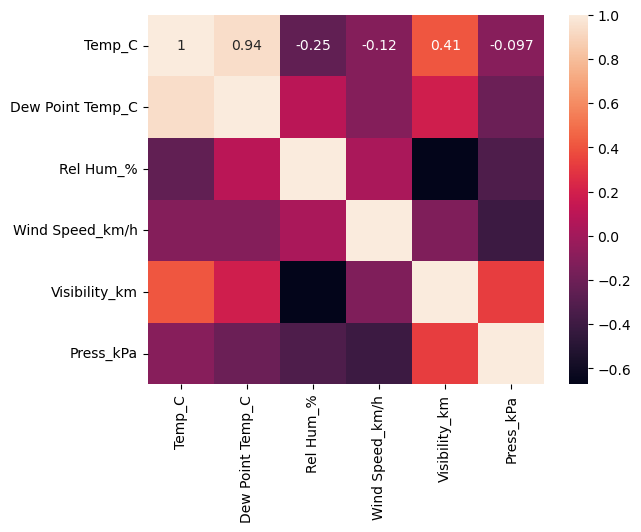

In [1924]:
# Creating a heatmap visualization of the correlation matrix with annotations
sns.heatmap(cor_matrix,annot=True)

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

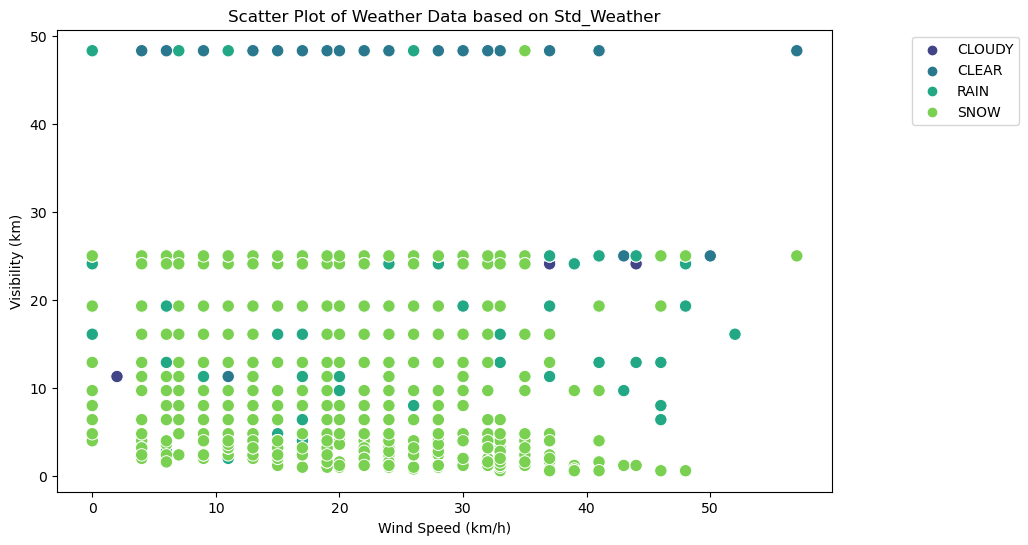

In [1925]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_data' is a DataFrame containing the mentioned columns

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', hue='Std_Weather', data=weather_df, palette='viridis', s=80)

# Set plot labels and title
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Visibility (km)')
plt.title('Scatter Plot of Weather Data based on Std_Weather')

# Add legend
scatter.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

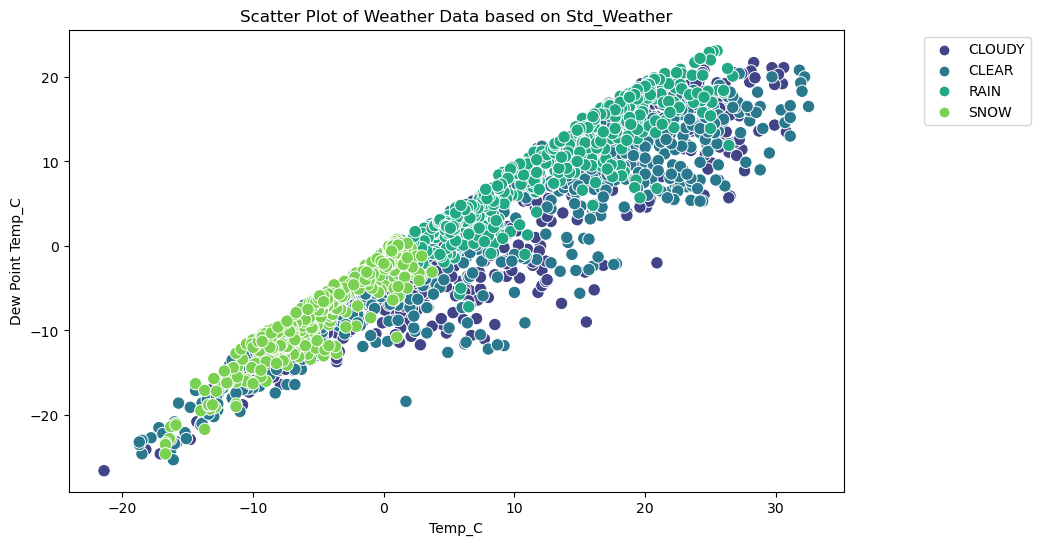

In [1926]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', hue='Std_Weather', data=weather_df, palette='viridis', s=80)

# Set plot labels and title
plt.xlabel('Temp_C')
plt.ylabel('Dew Point Temp_C')
plt.title('Scatter Plot of Weather Data based on Std_Weather')

# Add legend
scatter.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()

In [1927]:
# Displaying the column names of the 'weather_df' DataFrame
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

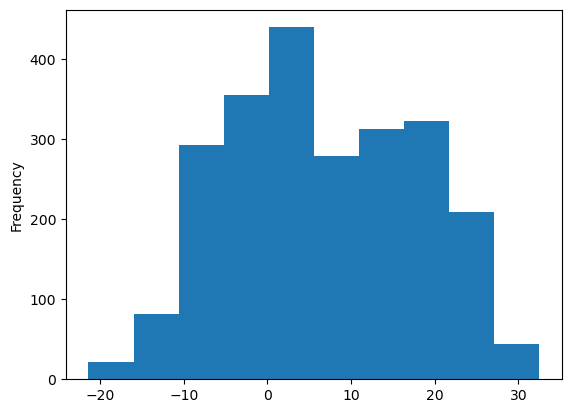

In [1928]:
# Displaying a histogram of the 'Temp_C' column in the 'weather_df' DataFrame
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

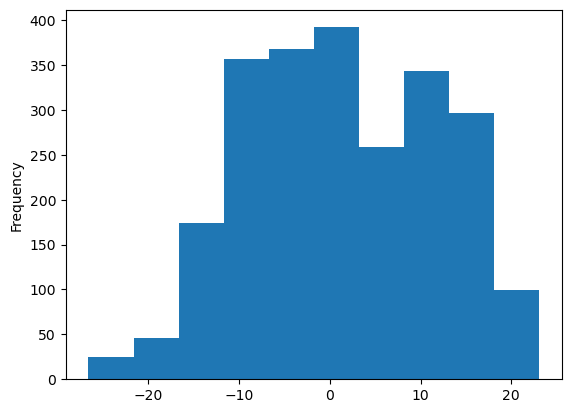

In [1929]:
# Displaying a histogram of the 'Dew Point Temp_C' column in the 'weather_df' DataFrame
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

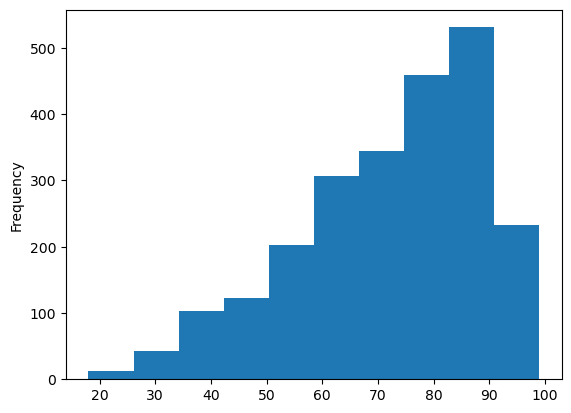

In [1930]:
# Displaying a histogram of the 'Rel Hum_%' column in the 'weather_df' DataFrame
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

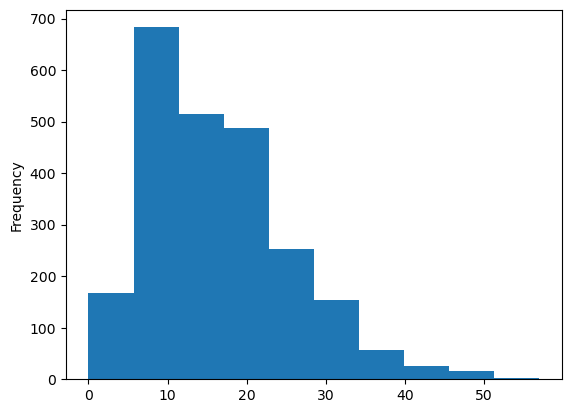

In [1931]:
# Displaying a histogram of the 'Wind Speed_km/h' column in the 'weather_df' DataFrame
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

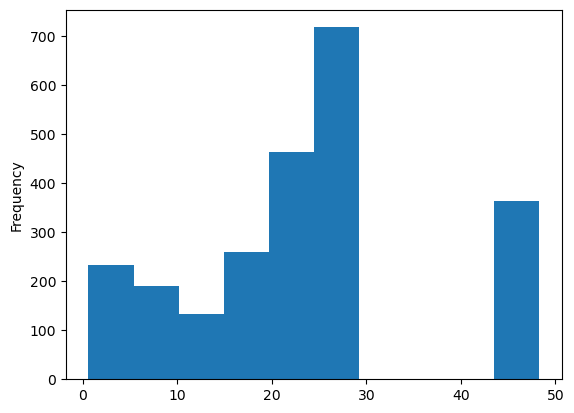

In [1932]:
# Displaying a histogram of the 'Visibility_km' column in the 'weather_df' DataFrame
weather_df['Visibility_km'].plot(kind='hist')

<Axes: ylabel='Frequency'>

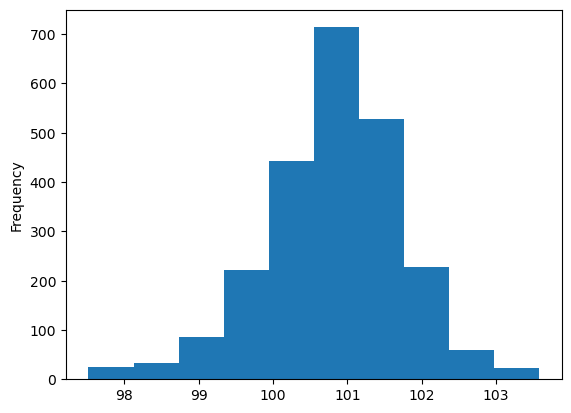

In [1933]:
# Displaying a histogram of the 'Press_kPa' column in the 'weather_df' DataFrame
weather_df['Press_kPa'].plot(kind='hist')

### Outlier Treatment

##### Remove outliers from feature Visibility_km

In [1934]:
# Calculating the first quartile (q1), third quartile (q3) and  interquartile range (iqr) for 'Visibility_km' colum
q1=weather_df['Visibility_km'].quantile(0.25)
q3=weather_df['Visibility_km'].quantile(0.75)
iqr=q3-q1


In [1935]:
# Displaying the values of q1, q3 and iqr
q1,q3,iqr

(16.1, 25.0, 8.899999999999999)

In [1936]:
# Calculating and displaying the upper and limit for potential outliers
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit


(2.7500000000000036, 38.349999999999994)

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


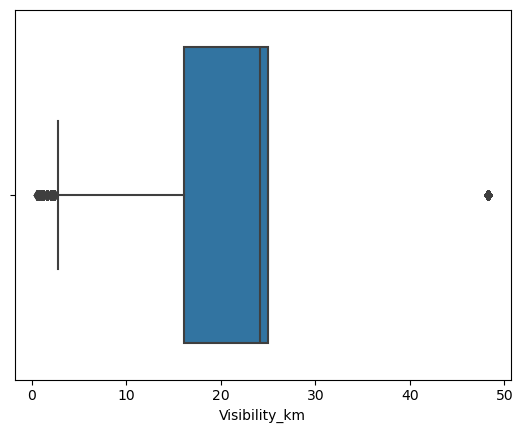

In [1937]:
# Creating a box plot for the 'Visibility_km' column
# Checking if 'Visibility_km' is a column in the 'weather_df' DataFrame
if 'Visibility_km' in weather_df.columns:
    sns.boxplot(x=weather_df['Visibility_km']) 
else:
    print("Column 'Visibility_km' not found in the DataFrame.") 

In [1938]:
# Selecting rows where 'Visibility_km' values are potential outliers
weather_df.loc[(weather_df['Visibility_km']>upper_limit) |(weather_df['Visibility_km']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
3064,20.9,-2.0,21,11,48.3,101.14,CLOUDY
1527,-5.6,-13.5,54,22,48.3,99.90,CLOUDY
1671,-2.7,-10.2,56,11,48.3,102.75,CLOUDY
2364,10.4,-3.8,37,17,48.3,100.25,CLOUDY
3179,18.6,4.0,38,20,48.3,101.36,CLOUDY
...,...,...,...,...,...,...,...
8728,-8.5,-9.9,90,24,1.2,100.49,SNOW
8729,-9.0,-10.4,90,19,2.4,100.46,SNOW
8734,-10.1,-11.6,89,15,2.4,100.20,SNOW
8737,-9.4,-10.5,92,9,2.4,100.22,SNOW


In [1939]:
#Trimming
# Creating a new DataFrame by excluding rows with potential outliers in 'Visibility_km'
new_weather_df=weather_df.loc[(weather_df['Visibility_km']<upper_limit) &(weather_df['Visibility_km']>lower_limit)]

# Printing information about the dataset before and after removing outliers
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 1883
 outliers: 476


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


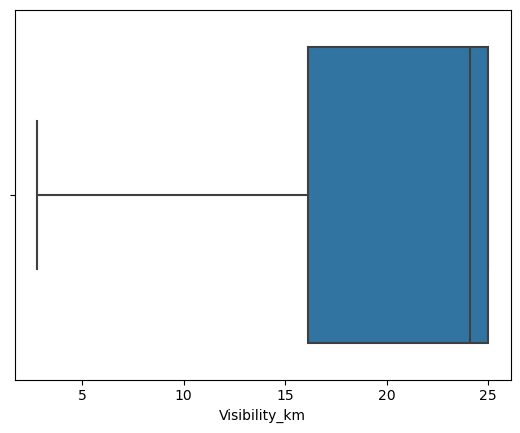

In [1940]:
# Creating a box plot for the 'Visibility_km' column after removing outliers
if 'Visibility_km' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

In [1941]:
# Capping

# Creating a copy of the original DataFrame
new_weather_df=weather_df.copy()

# Capping values exceeding the upper limit in 'Visibility_km' with the upper limit
new_weather_df.loc[(new_weather_df['Visibility_km']>upper_limit),'Visibility_km']=upper_limit

# Flooring values below the lower limit in 'Visibility_km' with the lower limit
new_weather_df.loc[(new_weather_df['Visibility_km']<lower_limit),'Visibility_km']=lower_limit


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


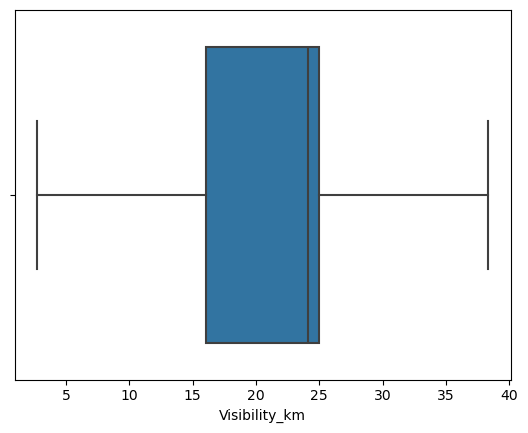

In [1942]:
# Creating a box plot for the 'Visibility_km' column after the capping
if 'Visibility_km' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

##### Remove outliers from feature Temp_C

In [1943]:
# Calculating the first quartile (q1), third quartile (q3) and  interquartile range (iqr) for 'Temp_C' colum
q1=weather_df['Temp_C'].quantile(0.25)
q3=weather_df['Temp_C'].quantile(0.75)
iqr=q3-q1

In [1944]:
# Displaying the values of q1, q3 and iqr
q1,q3,iqr

(-3.1, 16.1, 19.200000000000003)

In [1945]:
# Calculating and displaying the upper and limit for potential outliers
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-31.900000000000006, 44.900000000000006)

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


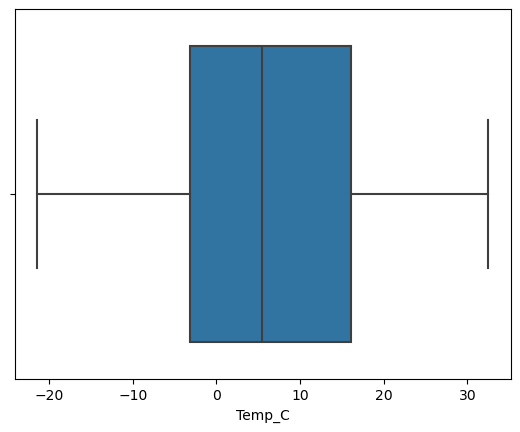

In [1946]:
# Creating a box plot for the 'Temp_C' column
if 'Temp_C' in weather_df.columns:
    sns.boxplot(x=weather_df['Temp_C'])
else:
    print("Column 'Temp_C' not found in the DataFrame.")

In [1947]:
# Selecting rows where 'Temp_C' values are potential outliers
weather_df.loc[(weather_df['Temp_C']>upper_limit) |(weather_df['Temp_C']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


##### Remove outliers from feature 'Dew Point Temp_C'

In [1948]:
# Calculating the first quartile (q1), third quartile (q3) and  inter quartile range (iqr) for 'Dew Point Temp_C' colum
q1=weather_df['Dew Point Temp_C'].quantile(0.25)
q3=weather_df['Dew Point Temp_C'].quantile(0.75)
iqr=q3-q1


In [1949]:
# Displaying the values of q1, q3 and iqr
q1,q3,iqr

(-6.9, 10.2, 17.1)

In [1950]:
# Calculating and displaying the upper and limit for potential outliers
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-32.550000000000004, 35.85)

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


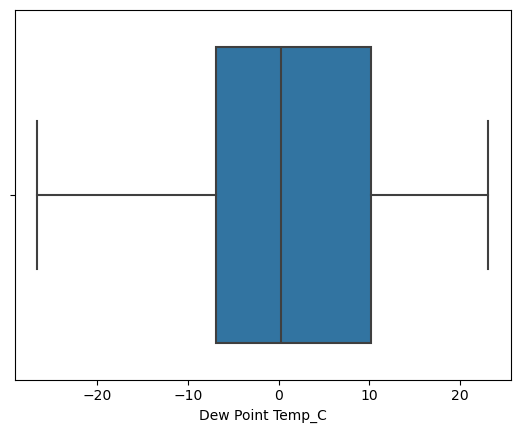

In [1951]:
# Creating a box plot for the 'Dew Point Temp_C' column
if 'Dew Point Temp_C' in weather_df.columns:
    sns.boxplot(x=weather_df['Dew Point Temp_C'])
else:
    print("Column 'Dew Point Temp_C' not found in the DataFrame.")

In [1952]:
# Selecting rows where 'Dew Point Temp_C' values are potential outliers
weather_df.loc[(weather_df['Dew Point Temp_C']>upper_limit) |(weather_df['Dew Point Temp_C']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


##### Remove outliers from feature 'Rel Hum_%'

In [1953]:
# Calculating the first quartile (q1), third quartile (q3) and  inter quartile range (iqr) for 'Rel Hum_%' colum
q1=weather_df['Rel Hum_%'].quantile(0.25)
q3=weather_df['Rel Hum_%'].quantile(0.75)
iqr=q3-q1

In [1954]:
# Displaying the values of q1, q3 and iqr
q1,q3,iqr

(62.0, 85.0, 23.0)

In [1955]:
# Calculating and displaying the upper and limit for potential outliers
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(27.5, 119.5)

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


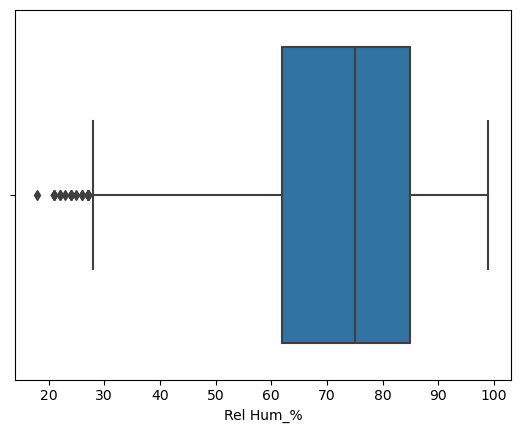

In [1956]:
# Creating a box plot for the 'Rel Hum_%' column
if 'Rel Hum_%' in weather_df.columns:
    sns.boxplot(x=weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [1957]:
# Selecting rows where 'Rel Hum_%' values are potential outliers
weather_df.loc[(weather_df['Rel Hum_%']>upper_limit) |(weather_df['Rel Hum_%']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
3064,20.9,-2.0,21,11,48.3,101.14,CLOUDY
1981,16.8,-2.3,27,7,48.3,101.71,CLOUDY
2491,13.6,-6.8,24,19,48.3,101.25,CLOUDY
4192,26.5,5.9,27,22,48.3,100.84,CLOUDY
2488,16.1,-5.2,23,30,48.3,101.22,CLOUDY
2320,8.5,-9.3,27,28,48.3,101.08,CLOUDY
2321,7.7,-11.0,25,32,48.3,101.11,CLOUDY
1984,15.5,-9.0,18,22,48.3,101.60,CLOUDY
4191,26.4,5.7,27,13,48.3,100.86,CLOUDY
2872,9.2,-11.8,21,28,48.3,101.66,CLEAR


In [1958]:
#Trimming
# Creating a new DataFrame by excluding rows with potential outliers in 'Rel Hum_%'
new_weather_df=weather_df.loc[(weather_df['Rel Hum_%']<upper_limit) &(weather_df['Rel Hum_%']>lower_limit)]

# Printing information about the dataset before and after removing outliers
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))


before removing outliers: 2359
after removing outliers: 2338
 outliers: 21


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


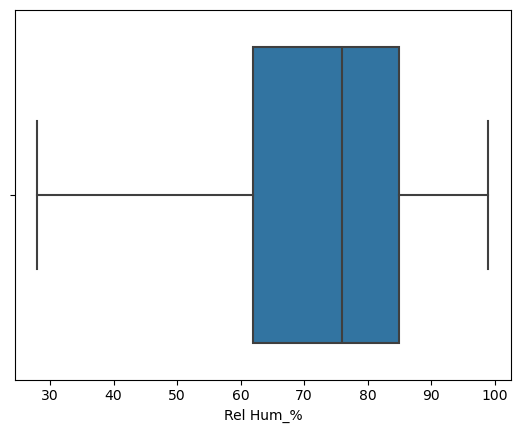

In [1959]:
# Creating a box plot for the 'Rel Hum_%' column after removing outliers
if 'Rel Hum_%' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [1960]:
# Capping

# Creating a copy of the original DataFrame
new_weather_df=weather_df.copy()

# Capping values exceeding the upper limit in 'Rel Hum_%' with the upper limit
new_weather_df.loc[(new_weather_df['Rel Hum_%']>upper_limit),'Rel Hum_%']=upper_limit

# Flooring values below the lower limit in 'Rel Hum_%' with the lower limit
new_weather_df.loc[(new_weather_df['Rel Hum_%']<lower_limit),'Rel Hum_%']=lower_limit

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2328\55696030.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '119.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_weather_df.loc[(new_weather_df['Rel Hum_%']>upper_limit),'Rel Hum_%']=upper_limit


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


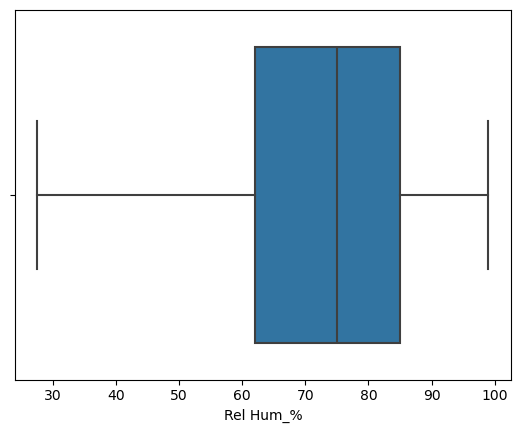

In [1961]:
# Creating a box plot for the 'Rel Hum_%' column after the capping
if 'Rel Hum_%' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

##### Remove outliers from feature 'Wind Speed_km/h'

In [1962]:
# Calculating the first quartile (q1), third quartile (q3) and  inter quartile range (iqr) for 'Wind Speed_km/h' colum
q1=weather_df['Wind Speed_km/h'].quantile(0.25)
q3=weather_df['Wind Speed_km/h'].quantile(0.75)
iqr=q3-q1

In [1963]:
# Displaying the values of q1, q3 and iqr
q1,q3,iqr

(9.0, 22.0, 13.0)

In [1964]:
# Calculating and displaying the upper and limit for potential outliers
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-10.5, 41.5)

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


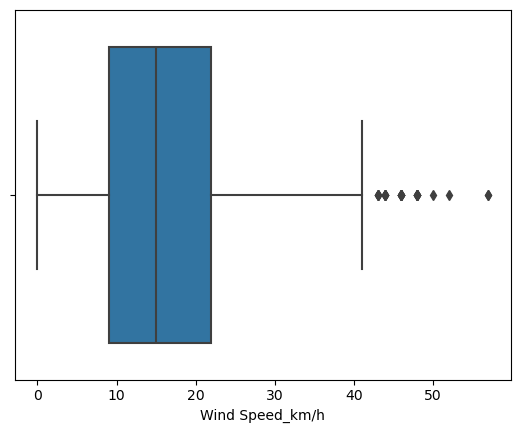

In [1965]:
# Creating a box plot for the 'Wind Speed_km/h' column
if 'Wind Speed_km/h' in weather_df.columns:
    sns.boxplot(x=weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [1966]:
# Selecting rows where 'Wind Speed_km/h' values are potential outliers
weather_df.loc[(weather_df['Wind Speed_km/h']>upper_limit) |(weather_df['Wind Speed_km/h']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
33,1.8,-3.7,67,44,24.1,99.14,CLOUDY
7264,15.2,9.8,70,48,24.1,100.04,CLOUDY
7265,14.2,9.4,73,48,24.1,99.94,CLOUDY
675,-0.2,-6.0,65,43,25.0,100.34,CLEAR
1508,3.2,-3.9,60,50,25.0,98.96,CLEAR
1505,4.3,-4.9,51,57,48.3,98.71,CLEAR
678,-2.0,-8.1,63,44,25.0,100.68,CLEAR
676,-0.9,-7.0,63,43,25.0,100.47,CLEAR
1626,10.5,7.8,83,46,6.4,99.64,RAIN
2712,1.9,-0.8,82,46,19.3,100.73,RAIN


In [1967]:
#Trimming

# Creating a new DataFrame by excluding rows with potential outliers in 'Wind Speed_km/h'
new_weather_df=weather_df.loc[(weather_df['Wind Speed_km/h']<upper_limit) &(weather_df['Wind Speed_km/h']>lower_limit)]

# Printing information about the dataset before and after removing outliers
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 2331
 outliers: 28


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


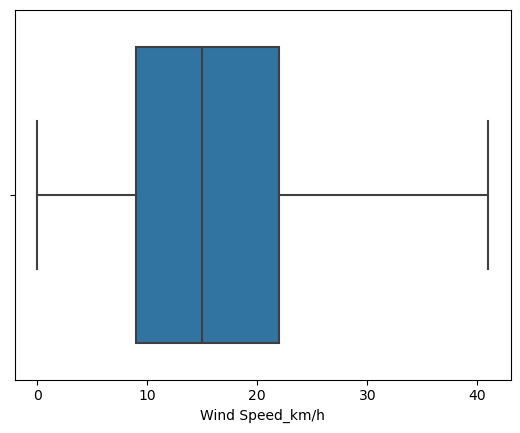

In [1968]:
# Creating a box plot for the 'Wind Speed_km/h' column after removing outliers
if 'Wind Speed_km/h' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [1969]:
# Capping

# Creating a copy of the original DataFrame
new_weather_df=weather_df.copy()

# Capping values exceeding the upper limit in 'Wind Speed_km/h' with the upper limit
new_weather_df.loc[(new_weather_df['Wind Speed_km/h']>upper_limit),'Wind Speed_km/h']=upper_limit

# Flooring values below the lower limit in 'Wind Speed_km/h' with the lower limit
new_weather_df.loc[(new_weather_df['Wind Speed_km/h']<lower_limit),'Wind Speed_km/h']=lower_limit

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2328\4093856608.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '41.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_weather_df.loc[(new_weather_df['Wind Speed_km/h']>upper_limit),'Wind Speed_km/h']=upper_limit


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


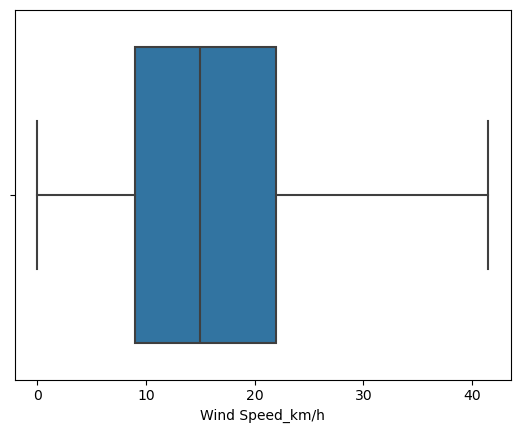

In [1970]:
# Creating a box plot for the 'Wind Speed_km/h' column after the capping
if 'Wind Speed_km/h' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

##### Remove outliers from feature 'Press_kPa'

In [1971]:
# Calculating the first quartile (q1), third quartile (q3) and  inter quartile range (iqr) for 'Press_kPa' colum
q1=weather_df['Press_kPa'].quantile(0.25)
q3=weather_df['Press_kPa'].quantile(0.75)
iqr=q3-q1

In [1972]:
# Displaying the values of q1, q3 and iqr
q1,q3,iqr

(100.33, 101.41, 1.0799999999999983)

In [1973]:
# Calculating and displaying the upper and limit for potential outliers
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(98.71000000000001, 103.03)

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


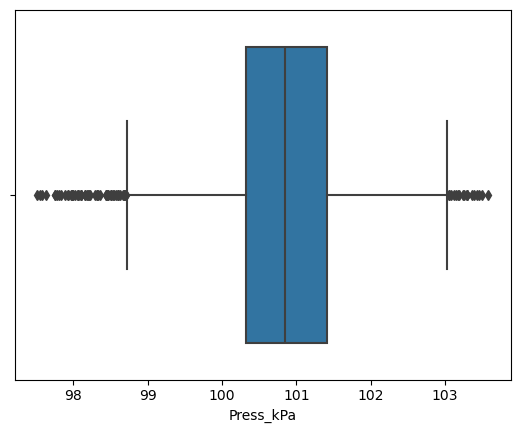

In [1974]:
# Creating a box plot for the 'Press_kPa' column
if 'Press_kPa' in weather_df.columns:
    sns.boxplot(x=weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [1975]:
# Selecting rows where 'Press_kPa' values are potential outliers
weather_df.loc[(weather_df['Press_kPa']>upper_limit) |(weather_df['Press_kPa']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7750,-1.3,-6.9,66,11,25.0,103.25,CLOUDY
2732,5.7,3.6,86,41,25.0,98.54,CLOUDY
7748,-1.8,-6.8,69,6,25.0,103.30,CLOUDY
7746,2.6,-7.5,47,9,25.0,103.36,CLOUDY
8046,-11.8,-15.0,77,26,25.0,103.18,CLOUDY
...,...,...,...,...,...,...,...
8550,-1.6,-3.0,90,41,4.0,98.19,SNOW
8551,-2.2,-3.7,89,35,4.8,98.32,SNOW
8552,-2.5,-4.5,86,41,4.0,98.44,SNOW
8553,-3.0,-5.0,86,35,3.2,98.58,SNOW


In [1976]:
#Trimming

# Creating a new DataFrame by excluding rows with potential outliers in 'Press_kPa'
new_weather_df=weather_df.loc[(weather_df['Press_kPa']<upper_limit) &(weather_df['Press_kPa']>lower_limit)]

# Printing information about the dataset before and after removing outliers
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 2284
 outliers: 75


c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


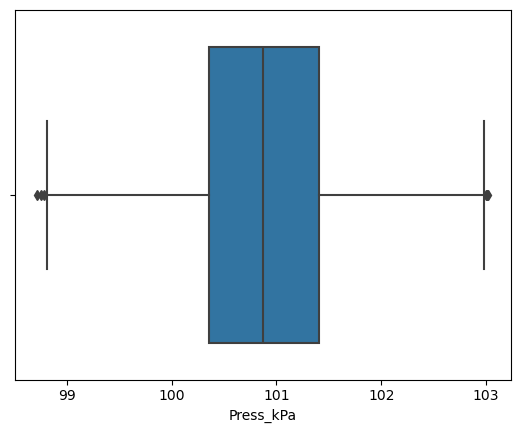

In [1977]:
# Creating a box plot for the 'Press_kPa' column after removing outliers
if 'Press_kPa' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [1978]:
# Capping

# Creating a copy of the original DataFrame
new_weather_df=weather_df.copy()

# Capping values exceeding the upper limit in 'Press_kPa' with the upper limit
new_weather_df.loc[(new_weather_df['Press_kPa']>upper_limit),'Press_kPa']=upper_limit

# Flooring values below the lower limit in 'Press_kPa' with the lower limit
new_weather_df.loc[(new_weather_df['Press_kPa']<lower_limit),'Press_kPa']=lower_limit

c:\Users\ADMIN\anaconda3\envs\myenv3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


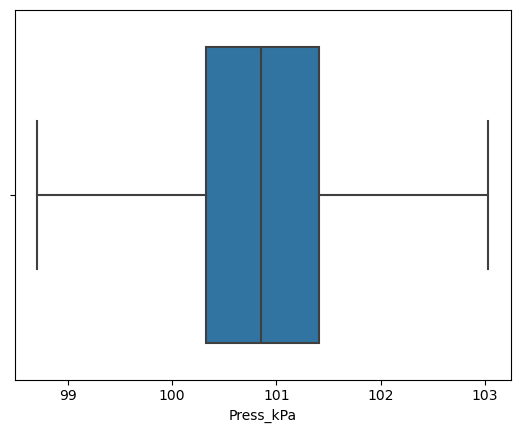

In [1979]:
# Creating a box plot for the 'Press_kPa' column after the capping
if 'Press_kPa' in new_weather_df.columns:
    sns.boxplot(x=new_weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [1980]:
# Displaying the first few rows of the modified 'new_weather_df' DataFrame after removing all outliers
new_weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
5360,19.4,17.8,90,15,12.9,100.66,CLOUDY
1518,-4.8,-11.6,59,17,25.0,99.84,CLOUDY
8122,8.0,6.3,89,19,19.3,101.16,CLOUDY
3064,20.9,-2.0,21,11,48.3,101.14,CLOUDY
1527,-5.6,-13.5,54,22,48.3,99.90,CLOUDY


### Label Encoding

#### Converting target variable into numeric values

In [1981]:
# Importing LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
label_Encoder=LabelEncoder()

# Encoding the 'Std_Weather' column in the 'new_weather_df' DataFrame
new_weather_df['Std_Weather']=label_Encoder.fit_transform(new_weather_df['Std_Weather'])

# Obtaining the mapping between original categorical values and numerical labels
label_Encoder.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [1982]:
# Displaying the first few rows of the modified 'new_weather_df' DataFrame after the Encoding
new_weather_df.head	()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
5360,19.4,17.8,90,15,12.9,100.66,1
1518,-4.8,-11.6,59,17,25.0,99.84,1
8122,8.0,6.3,89,19,19.3,101.16,1
3064,20.9,-2.0,21,11,48.3,101.14,1
1527,-5.6,-13.5,54,22,48.3,99.90,1


In [1983]:
# Displaying the count of each unique value in the 'Std_Weather' column of the 'new_weather_df' DataFrame after the Encoding
new_weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

#### X,Y Variables

In [1984]:
# Creating a new DataFrame 'X' by dropping the 'Std_Weather' column
X=new_weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
5360,19.4,17.8,90,15,12.9,100.66
1518,-4.8,-11.6,59,17,25.0,99.84
8122,8.0,6.3,89,19,19.3,101.16
3064,20.9,-2.0,21,11,48.3,101.14
1527,-5.6,-13.5,54,22,48.3,99.90
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [1985]:
# Creating a new Series 'Y' by selecting the 'Std_Weather' column
Y=new_weather_df['Std_Weather']
Y

5360    1
1518    1
8122    1
3064    1
1527    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int32

### Feature Scaling

In [1986]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler instance
std_scaler=StandardScaler()

# Standardizing the features in the DataFrame 'X'
X_std=std_scaler.fit_transform(X)
X_std

array([[ 1.14039454,  1.57715003,  1.10291077, -0.1665053 , -0.81165722,
        -0.19300886],
       [-1.00889468, -1.24688779, -0.79079358,  0.04860204,  0.12493647,
        -1.12910476],
       [ 0.12791945,  0.47250939,  1.04182354,  0.26370938, -0.31626882,
         0.37778132],
       ...,
       [-0.62699618, -0.27672513,  1.28617248,  1.23169241, -1.43863316,
        -1.00353092],
       [-0.6003521 , -0.30554185,  1.04182354,  1.23169241, -1.05935142,
        -1.04919413],
       [-0.58258938, -0.33435856,  0.85856183,  1.44679974, -0.93550432,
        -1.07202574]])

### Splitting Data into training and testing set

In [1987]:
# Importing train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X_std,Y,test_size=0.3,random_state=3)

# Displaying the shapes of the training and testing sets
x_train.shape,x_test.shape

((1651, 6), (708, 6))

### Building Logistic Regression Model

####    Cross validation & Model Evaluation

Cross-validated accuracies: [0.63253012 0.60606061 0.63636364 0.60606061 0.6        0.56363636
 0.62424242 0.58181818 0.66060606 0.70909091]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       174
           1       0.47      0.34      0.39       183
           2       0.71      0.69      0.70       188
           3       0.79      0.85      0.82       163

    accuracy                           0.64       708
   macro avg       0.63      0.64      0.63       708
weighted avg       0.63      0.64      0.63       708

--------------------------------------------------
Accuracy: 0.6384180790960452
Precision: 0.6317353327911477
Recall: 0.6447195471143208
F1 Score: 0.6334505695886741


<Figure size 3000x3000 with 0 Axes>

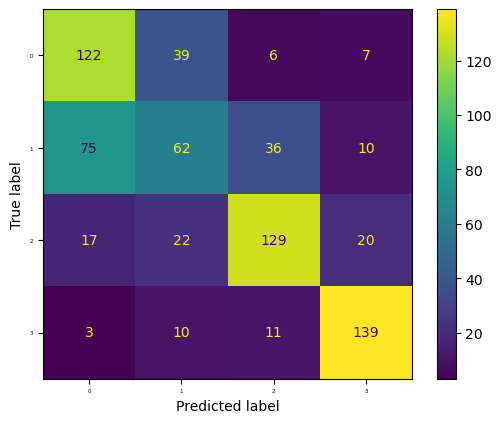

In [1988]:

# Importing cross_val_score and LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
logistic_model = LogisticRegression()

# Performing cross-validation and obtaining the accuracies
accuracies = cross_val_score(estimator=logistic_model, X=x_train, y=y_train, cv=10)
print("Cross-validated accuracies:", accuracies)

# Call the function which is already defined in the early section
train_and_evaluate_model(logistic_model, x_train, x_test, y_train, y_test)


In [1989]:
# Calculate and print the average accuracy and standard deviation
print("Average accuracy:", np.mean(accuracies))
print("Average std:", np.std(accuracies))

# Fit the logistic regression model on the training data
logistic_model.fit(x_train, y_train)

# Print the train accuracy
train_accuracy = logistic_model.score(x_train, y_train)
print("Train accuracy:",train_accuracy)

Average accuracy: 0.6220408908360715
Average std: 0.03925619023150696
Train accuracy: 0.6293155663234403


# Result

In [1990]:
model_perfs = pd.DataFrame({'Model': models, 
                            'Accuracy': accuracy_scores, 
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores}).sort_values('Accuracy',ascending=False).reset_index()
model_perfs

,index,Model,Accuracy,Precision,Recall,F1
0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0.898575,0.894169,0.898968,0.889868
1,1,LogisticRegression(),0.638418,0.631735,0.644720,0.633451
